# 1번 문제

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [16]:
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF ['variety'] =iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [17]:
irisDF.shape

(150, 5)

In [18]:
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   variety       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [19]:
x = irisDF['sepal_width']
y = irisDF.variety

In [20]:
from sklearn.model_selection import train_test_split

In [24]:
#x_train, x_test, y_train, y_test = \
#    train_test_split(x, y, test_size=0.2, random_state=2020)

In [33]:
x_train, x_test, y_train, y_test = \
    train_test_split(x, y,test_size=0.2, random_state=2020)

In [36]:
from sklearn.linear_model import LinearRegression
iris_lr = LinearRegression()

In [37]:
iris_lr.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_pred = iris_lr.predict(x_test.values.reshape(-1,1))

In [39]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.21907490726778522

In [40]:
from sklearn.metrics import mean_squared_error
def single_regression(x_train, x_test, y_train, y_test):
    iris_lr = LinearRegression()
    iris_lr.fit(x_train.values.reshape(-1,1), y_train)
    y_pred = iris_lr.predict(x_test.values.reshape(-1,1))
    rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
    return rmse, slr.coef_[0], slr.intercept_

In [41]:
x_train, x_test, y_train, y_test = \
    train_test_split(irisDF['sepal_width'], irisDF.variety, 
                     test_size=0.2, random_state=2020)

In [45]:
from sklearn.linear_model import LinearRegression
iris_lr = LinearRegression()
iris_lr.fit(x_train.values.reshape(-1,1), y_train)
y_pred = iris_lr.predict(x_test.values.reshape(-1,1))
rmse_lr = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

In [46]:
print(rmse_lr)

0.72


# 2번

In [196]:
df = pd.read_csv('./data/ThoraricSurgery.csv',header=0, sep='\t',quoting=3)
df.head()

,"293,1,3.8,2.8,0,0,0,0,0,0,12,0,0,0,1,0,62,0"
0,"1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0"
1,"8,2,3.19,2.5,1,0,0,0,1,0,11,0,0,1,1,0,66,1"
2,"14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1"
3,"17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0"
4,"18,2,2.96,1.67,0,0,0,0,0,0,12,0,0,0,1,0,61,0"


In [197]:
df.iloc[:]

,"293,1,3.8,2.8,0,0,0,0,0,0,12,0,0,0,1,0,62,0"
0,"1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0"
1,"8,2,3.19,2.5,1,0,0,0,1,0,11,0,0,1,1,0,66,1"
2,"14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1"
3,"17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0"
4,"18,2,2.96,1.67,0,0,0,0,0,0,12,0,0,0,1,0,61,0"
...,...
464,"98,6,3.04,2.4,2,0,0,0,1,0,11,0,0,0,1,0,76,0"
465,"369,6,3.88,2.72,1,0,0,0,1,0,12,0,0,0,1,0,77,0"
466,"406,6,5.36,3.96,1,0,0,0,1,0,12,0,0,0,0,0,62,0"
467,"25,8,4.32,3.2,0,0,0,0,0,0,11,0,0,0,0,0,58,1"


# 3번

In [48]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [58]:
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_samples, silhouette_score

feature_names = ['sepal_length','sepal_witdth', 'petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0).fit(irisDF)
irisDF['cluster'] =kmeans.labels_

score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

irisDF['silhouette_coeff'] = score_samples

average_score = silhouette_score(iris.data, irisDF['cluster'])
print('불꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'. format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
불꽃 데이터 세트 Silhouette Analysis Score:0.553


,sepal_length,sepal_witdth,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [59]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.451105
1    0.798140
2    0.417320
Name: silhouette_coeff, dtype: float64

In [60]:
import matplotlib.cm as cm
import math

def visualize_silhouette(cluster_lists, X_features):    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

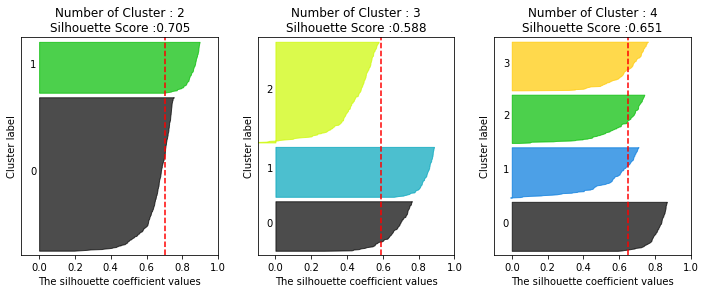

In [62]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([2, 3, 4], X)

# 4번

In [63]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [195]:
review_df = pd.read_csv('./data/midway.tsv', header=0, sep='\t', 
                        quoting=3)
review_df.head(3)     

,Unnamed: 0,평점,일시,감상평
0,0,9,2019.12.31 09:48,미드웨이가 재밌으면 추천 백두산이 재밌으면 비추
1,1,10,2019.12.31 10:41,저 해전이 있었기에 우리나라 광복도 가능 했음
2,2,10,2019.12.31 09:38,백두산 상영관 대폭줄이고 미드웨이 상영관 대폭늘려라


In [113]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4825 entries, 0 to 4824
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4825 non-null   int64 
 1   평점          4825 non-null   int64 
 2   일시          4825 non-null   object
 3   감상평         4316 non-null   object
dtypes: int64(2), object(2)
memory usage: 150.9+ KB


In [193]:
review_df['평점']

0        9
1       10
2       10
3       10
4       10
        ..
4820     1
4821     2
4822     2
4823     4
4824     1
Name: 평점, Length: 4825, dtype: int64